In [2]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [3]:
# Load the 'Customer Churn Problem' data

CustChurn_T = pd.read_csv(r"Churn_Modelling.csv", header=0)
CustChurn_T.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Split the data and copy 10% data (stratified split on target variable) to new dataset 

CustChurn = CustChurn_T.groupby('Exited', group_keys=False).apply(lambda x: x.sample(frac=0.1))

# Display the shape

CustChurn.shape

(1000, 14)

In [5]:
# Re-set the index

CustChurn = CustChurn.reset_index(drop=True)

# Copy to back-up file

CustChurn_bk = CustChurn.copy()

# Display information of the dataset

CustChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        1000 non-null   int64  
 1   CustomerId       1000 non-null   int64  
 2   Surname          1000 non-null   object 
 3   CreditScore      1000 non-null   int64  
 4   Geography        1000 non-null   object 
 5   Gender           1000 non-null   object 
 6   Age              1000 non-null   int64  
 7   Tenure           1000 non-null   int64  
 8   Balance          1000 non-null   float64
 9   NumOfProducts    1000 non-null   int64  
 10  HasCrCard        1000 non-null   int64  
 11  IsActiveMember   1000 non-null   int64  
 12  EstimatedSalary  1000 non-null   float64
 13  Exited           1000 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 109.5+ KB


In [6]:
# Display the Gender varibale count

CustChurn_T['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
# Display the Gender varibale count

CustChurn['Exited'].value_counts()

0    796
1    204
Name: Exited, dtype: int64

In [8]:
# Check if there are duplicate rows in the dataset

CustChurn.duplicated().any()

False

In [9]:
# Drop the variables which are not infulencing on target variable

CustChurn = CustChurn.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [10]:
# Display the Geography varibles count

CustChurn['Geography'].value_counts()

France     495
Germany    263
Spain      242
Name: Geography, dtype: int64

In [11]:
# Display the Gender varibale count

CustChurn['Gender'].value_counts()

Male      534
Female    466
Name: Gender, dtype: int64

In [12]:
# Convert 'Geography' and 'Gender' to numerical format using one hot encoding

CustChurn = pd.get_dummies(CustChurn, columns=['Geography', 'Gender'])
CustChurn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,579,29,10,73194.52,2,1,1,129209.09,0,1,0,0,1,0
1,701,41,9,164046.10,1,1,0,49405.93,0,0,1,0,0,1
2,652,40,8,84390.80,2,0,1,107876.20,0,1,0,0,1,0
3,779,41,10,99786.20,1,1,0,86927.53,0,1,0,0,1,0
4,639,27,8,0.00,2,1,0,192247.35,0,1,0,0,0,1


In [13]:
# Display the information of dataset after conversion of variables

CustChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        1000 non-null   int64  
 1   Age                1000 non-null   int64  
 2   Tenure             1000 non-null   int64  
 3   Balance            1000 non-null   float64
 4   NumOfProducts      1000 non-null   int64  
 5   HasCrCard          1000 non-null   int64  
 6   IsActiveMember     1000 non-null   int64  
 7   EstimatedSalary    1000 non-null   float64
 8   Exited             1000 non-null   int64  
 9   Geography_France   1000 non-null   uint8  
 10  Geography_Germany  1000 non-null   uint8  
 11  Geography_Spain    1000 non-null   uint8  
 12  Gender_Female      1000 non-null   uint8  
 13  Gender_Male        1000 non-null   uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 75.3 KB


In [14]:
# Convert the target data type into category variable

CustChurn['Exited'] = CustChurn['Exited'].astype("category")

In [15]:
# Identify the Independent and Target variables

IndepVar = []
for col in CustChurn.columns:
    if col != 'Exited':
        IndepVar.append(col)

TargetVar = 'Exited'

x = CustChurn[IndepVar]
y = CustChurn[TargetVar]

In [16]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42) 

In [17]:
# Load the Hyperparameter tunining result dataset

HTResults = pd.read_csv(r"E:\SDP-2\S15-Hyperparameter Tuning\HTResults.csv", header=0)
HTResults.head()

,Model Name,True _Positive,False _Negative,False _Positive,True _Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Confusion matrix : 
 [[ 26  42]
 [ 12 220]]
Outcome values : 
 26 42 12 220
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.38      0.49        68
           0       0.84      0.95      0.89       232

    accuracy                           0.82       300
   macro avg       0.76      0.67      0.69       300
weighted avg       0.80      0.82      0.80       300

Accuracy : 82.0 %
Precision : 68.4 %
Recall : 38.2 %
F1 Score : 0.491
Specificity or True Negative Rate : 94.8 %
Balanced Accuracy : 66.5 %
MCC : 0.416
roc_auc_score: 0.665


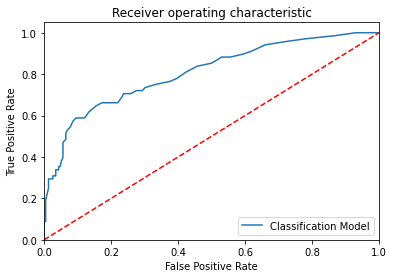

-----------------------------------------------------------------------------------------------------


In [25]:
# To build the 'ExtraTreesClassifier' model with random sampling along with default hyper parameters values

from sklearn.ensemble import ExtraTreesClassifier

ModelET = ExtraTreesClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                               max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=False, oob_score=False, 
                               n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                               ccp_alpha=0.0, max_samples=None)

# Train the model with train data 

ModelET.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelET.predict(x_test)
y_pred_prob = ModelET.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelET.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelET,
           'True _Positive': tp,
           'False _Negative': fn, 
           'False _Positive': fp, 
           'True _Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [26]:
HTResults.head()

,Model Name,True _Positive,False _Negative,False _Positive,True _Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy,False_Negative,False_Positive,True_Negative,True_Positive
0,"(ExtraTreeClassifier(random_state=1638044895),...",NaN,NaN,NaN,NaN,0.827,0.711,0.397,0.509,0.953,0.44,0.674823,0.675,41.0,11.0,221.0,27.0
1,"(ExtraTreeClassifier(criterion='entropy', max_...",21,47,5,227,0.827,0.808,0.309,0.447,0.978,0.427,0.643636,0.644,NaN,NaN,NaN,NaN
2,"(ExtraTreeClassifier(random_state=1868578009),...",26,42,12,220,0.82,0.684,0.382,0.491,0.948,0.416,0.665314,0.665,NaN,NaN,NaN,NaN


In [27]:
# Hyperparametr tuning with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split

max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 1000, 10)]

# Minimum number of samples required to split a node

min_samples_split = [2, 5, 10, 14]

# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 4, 6, 8]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion':['entropy','gini']}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [28]:
# Create model object

ModelET = ExtraTreesClassifier()

ModelET_randomcv=RandomizedSearchCV(estimator=ModelET, param_distributions=random_grid, n_iter=100, cv=3, verbose=2,
                                    random_state=100, n_jobs=-1)
### fit the randomized model

ModelET_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [29]:
# best or the optimal values of the parameters for which the model performed the best

ModelET_randomcv.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 560,
 'criterion': 'entropy'}

Confusion matrix : 
 [[ 21  47]
 [  5 227]]
Outcome values : 
 21 47 5 227
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.31      0.45        68
           0       0.83      0.98      0.90       232

    accuracy                           0.83       300
   macro avg       0.82      0.64      0.67       300
weighted avg       0.82      0.83      0.80       300

Accuracy : 82.7 %
Precision : 80.8 %
Recall : 30.9 %
F1 Score : 0.447
Specificity or True Negative Rate : 97.8 %
Balanced Accuracy : 64.4 %
MCC : 0.427
roc_auc_score: 0.644


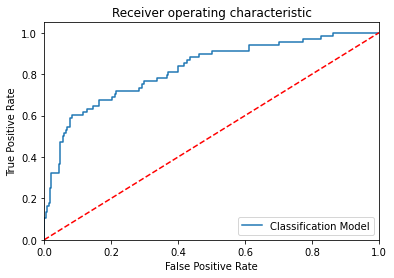

-----------------------------------------------------------------------------------------------------


In [30]:
# To build the 'ExtraTreesClassifier' model with random sampling with Hyperparameter tuning with RandomizedSearchCV

from sklearn.ensemble import ExtraTreesClassifier

ModelET = ExtraTreesClassifier(n_estimators=200, criterion='entropy', max_depth=450, min_samples_split=14, 
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                               max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=False, oob_score=False, 
                               n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                               ccp_alpha=0.0, max_samples=None)

# Train the model with train data 

ModelET.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelET.predict(x_test)
y_pred_prob = ModelET.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelET.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelET,
           'True _Positive': tp,
           'False _Negative': fn, 
           'False _Positive': fp, 
           'True _Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [31]:
HTResults.head()

,Model Name,True _Positive,False _Negative,False _Positive,True _Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy,False_Negative,False_Positive,True_Negative,True_Positive
0,"(ExtraTreeClassifier(random_state=1638044895),...",NaN,NaN,NaN,NaN,0.827,0.711,0.397,0.509,0.953,0.44,0.674823,0.675,41.0,11.0,221.0,27.0
1,"(ExtraTreeClassifier(criterion='entropy', max_...",21,47,5,227,0.827,0.808,0.309,0.447,0.978,0.427,0.643636,0.644,NaN,NaN,NaN,NaN
2,"(ExtraTreeClassifier(random_state=1868578009),...",26,42,12,220,0.82,0.684,0.382,0.491,0.948,0.416,0.665314,0.665,NaN,NaN,NaN,NaN
3,"(ExtraTreeClassifier(criterion='entropy', max_...",21,47,5,227,0.827,0.808,0.309,0.447,0.978,0.427,0.643636,0.644,NaN,NaN,NaN,NaN


In [32]:
# Hyperparameter tuning by GridSearchCV

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 

GS_grid = {'bootstrap': [True, False],
           'max_depth': [10,15],
           'max_features': [2, 3],
           'min_samples_leaf': [3, 4, 5,6],
           'min_samples_split': [3,4,5,6],
           'n_estimators': [1150, 1200, 1250, 1300,1350],
           'criterion':['entropy','gini']
           }

# Create object for model

ModelET = ExtraTreesClassifier()

# Instantiate the grid search model

Grid_search = GridSearchCV(estimator = ModelET, param_grid = GS_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data

Grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 1280 candidates, totalling 3840 fits


GridSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15], 'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [1150, 1200, 1250, 1300, 1350]},
             verbose=2)

In [25]:
# Best parameter from gridseachCV

Grid_search.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 1300}

Confusion matrix : 
 [[ 11  57]
 [  4 228]]
Outcome values : 
 11 57 4 228
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.16      0.27        68
           0       0.80      0.98      0.88       232

    accuracy                           0.80       300
   macro avg       0.77      0.57      0.57       300
weighted avg       0.78      0.80      0.74       300

Accuracy : 79.7 %
Precision : 73.3 %
Recall : 16.2 %
F1 Score : 0.265
Specificity or True Negative Rate : 98.3 %
Balanced Accuracy : 57.2 %
MCC : 0.278
roc_auc_score: 0.572


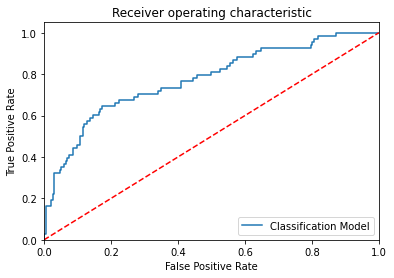

-----------------------------------------------------------------------------------------------------


In [26]:
# To build the 'ExtraTreesClassifier' model with random sampling with Hyperparameter tuning with GridSearchCV

from sklearn.ensemble import ExtraTreesClassifier

ModelET = ExtraTreesClassifier(n_estimators=1300, criterion='entropy', max_depth=15, min_samples_split=4, 
                               min_samples_leaf=3, min_weight_fraction_leaf=0.0, max_features=3, 
                               max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=False, oob_score=False, 
                               n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                               ccp_alpha=0.0, max_samples=None)

# Train the model with train data

ModelET.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelET.predict(x_test)
y_pred_prob = ModelET.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelET.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelET,
           'True_Positive': tp,
           'False_Negative': fn, 
           'False_Positive': fp, 
           'True_Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [27]:
# Results with comparing the all the algorithms 

#HTResults.to_csv("D://000 DataScience//01-Internship//HTResults_01.csv")

HTResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,"(ExtraTreeClassifier(max_features='sqrt', rand...",20,48,15,217,0.790,0.571,0.294,0.388,0.935,0.299,0.614731,0.614
1,"(ExtraTreeClassifier(criterion='entropy', max_...",16,52,5,227,0.810,0.762,0.235,0.360,0.978,0.351,0.606871,0.606
2,"(ExtraTreeClassifier(criterion='entropy', max_...",11,57,4,228,0.797,0.733,0.162,0.265,0.983,0.278,0.572262,0.572
